In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
base=pd.read_csv('Base.csv')
variant_1=pd.read_csv('Variant I.csv')
variant_2=pd.read_csv('Variant II.csv')
variant_3=pd.read_csv('Variant III.csv')
variant_4=pd.read_csv('Variant IV.csv')
variant_5=pd.read_csv('Variant V.csv')

In [4]:
names=['Base','Variant I','Variant II','Variant III','Variant IV','Variant V']
dfs=[base,variant_1,variant_2,variant_3,variant_4,variant_5]
for i in range(6):
    print('the shape of the variant named',names[i],'is',dfs[i].shape)

the shape of the variant named Base is (1000000, 32)
the shape of the variant named Variant I is (1000000, 32)
the shape of the variant named Variant II is (1000000, 32)
the shape of the variant named Variant III is (1000000, 34)
the shape of the variant named Variant IV is (1000000, 32)
the shape of the variant named Variant V is (1000000, 34)


- as we can see all the variants have 32 columns with the same names and 1M records.

In [5]:
## checking the distribution of labels in all the variants
for i in range(6):
    print('The distribution of the label in the',names[i],'Variant is\n ')
    print(dfs[i]['fraud_bool'].value_counts(normalize=True),'\n')

The distribution of the label in the Base Variant is
 
0    0.988971
1    0.011029
Name: fraud_bool, dtype: float64 

The distribution of the label in the Variant I Variant is
 
0    0.988971
1    0.011029
Name: fraud_bool, dtype: float64 

The distribution of the label in the Variant II Variant is
 
0    0.988971
1    0.011029
Name: fraud_bool, dtype: float64 

The distribution of the label in the Variant III Variant is
 
0    0.98897
1    0.01103
Name: fraud_bool, dtype: float64 

The distribution of the label in the Variant IV Variant is
 
0    0.98897
1    0.01103
Name: fraud_bool, dtype: float64 

The distribution of the label in the Variant V Variant is
 
0    0.98897
1    0.01103
Name: fraud_bool, dtype: float64 



# comparing the Base and Variant I  
- as the authors mentioned that the Variant one have higher group size disparity.

In [6]:
# let's try to find the columns where the disparity is different.
base.describe(percentiles=[0.01,0.25,0.75,0.99])

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
1%,0.000000,0.100000,0.021672,-1.000000,0.000000,10.000000,2.825563e-04,-1.831266,248.000000,695.593750,...,0.000000,-1.000000,0.000000,200.000000,0.000000,0.651256,0.000000,1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
99%,1.000000,0.900000,0.997470,231.000000,370.000000,60.000000,2.199567e+01,100.826524,4970.000000,13932.187847,...,1.000000,31.000000,1.000000,1500.000000,1.000000,44.552828,1.000000,2.000000,0.0,7.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [7]:
variant_1.describe(percentiles=[0.01,0.25,0.75,0.99])

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.560867,4.946516e-01,16.960120,83.585392,31.974200,1.051720e+00,8.715090,1574.468789,5661.914760,...,0.898214,10.799300,0.218157,507.156910,0.025010,7.464706,0.579841,1.016889,0.0,3.288668
std,0.104438,0.290389,2.888474e-01,43.870653,86.458280,10.897167,5.462110e+00,20.210541,1003.700453,3010.869604,...,0.302367,12.121409,0.412995,481.460578,0.156155,7.948670,0.493584,0.175465,0.0,2.209990
min,0.000000,0.100000,5.024707e-08,-1.000000,-1.000000,10.000000,1.373749e-08,-15.739893,1.000000,-174.109691,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
1%,0.000000,0.100000,2.174722e-02,-1.000000,0.000000,10.000000,2.840912e-04,-1.832548,245.000000,694.202609,...,0.000000,-1.000000,0.000000,200.000000,0.000000,0.654614,0.000000,1.000000,0.0,0.000000
25%,0.000000,0.300000,2.268462e-01,-1.000000,18.000000,20.000000,7.150757e-03,-1.180401,893.000000,3431.170414,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.092919,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,4.922199e-01,-1.000000,50.000000,30.000000,1.510390e-02,-0.828224,1270.000000,5299.991908,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.081925,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,7.558383e-01,15.000000,124.000000,40.000000,2.618513e-02,6.215877,1952.000000,7692.312342,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.758878,1.000000,1.000000,0.0,5.000000
99%,1.000000,0.900000,9.975185e-01,230.000000,368.000000,60.000000,2.238587e+01,100.740495,4956.000000,13907.831095,...,1.000000,31.000000,1.000000,1500.000000,1.000000,43.985887,1.000000,2.000000,0.0,7.000000
max,1.000000,0.900000,1.000000e+00,399.000000,429.000000,90.000000,7.663502e+01,113.120051,6678.000000,16817.838935,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.567848,1.000000,2.000000,0.0,7.000000


In [8]:
def compare_categorical(base, variant, column,width):
    group_sizes_base = base.groupby(column).size()
    group_sizes_variant = variant.groupby(column).size()
    disparities = group_sizes_variant / group_sizes_base

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot base dataset
    axs[0].bar(group_sizes_base.index, group_sizes_base.values, width=width)  # Adjust width for better visualization
    axs[0].set_title('Base Dataset')
    axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Plot variant dataset
    axs[1].bar(group_sizes_variant.index, group_sizes_variant.values, width=width)  # Adjust width for better visualization
    axs[1].set_title('Variant Dataset')
    axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Plot disparities
    axs[2].bar(disparities.index, disparities.values, width=width)  # Adjust width for better visualization
    axs[2].set_title('Disparities')
    axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Set a custom formatter for x-axis ticks in the disparities plot
    axs[2].xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

    plt.tight_layout()
    plt.show()

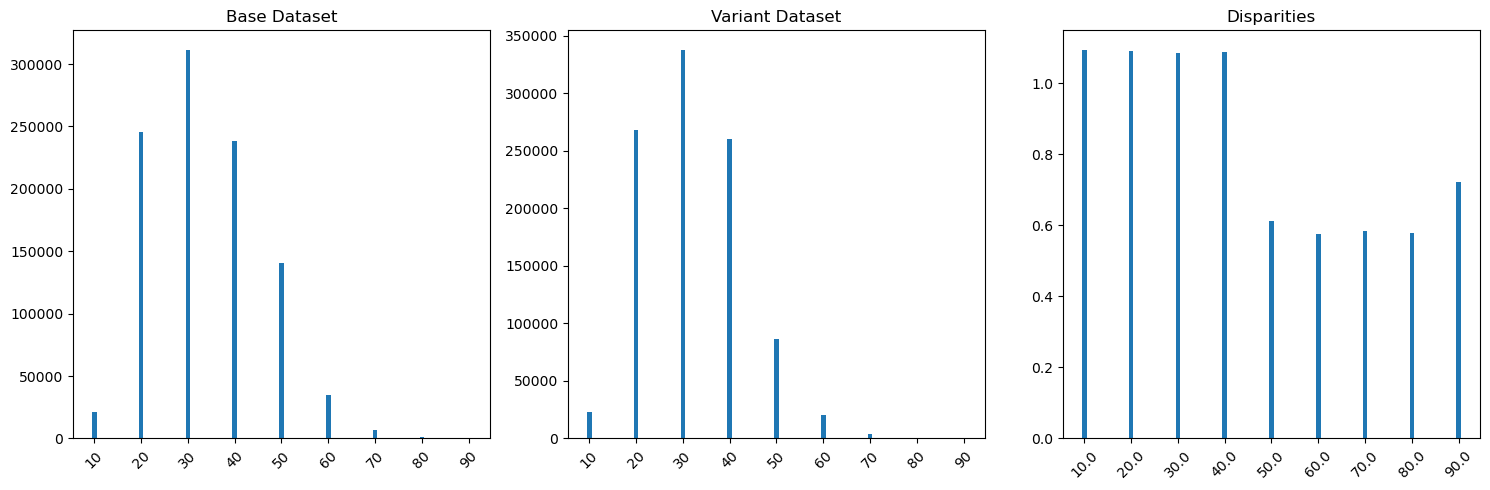

In [9]:
compare_categorical(base,variant_1,'customer_age',1)

- as we can see there is disparity in customer ages as the lower age categories tend to be higher while the the higher categories tend to decrease.

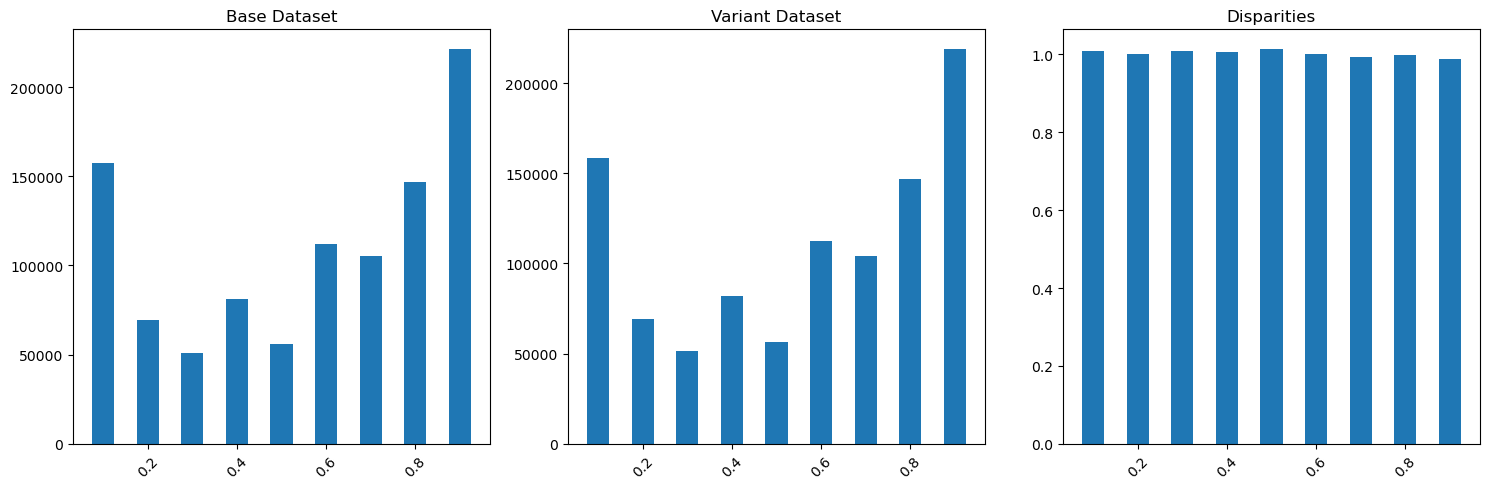

In [10]:
compare_categorical(base,variant_1,'income',0.05)

In [11]:
base.income.value_counts()

0.9    221419
0.1    157449
0.8    146650
0.6    111973
0.7    105109
0.4     81364
0.2     69345
0.5     55858
0.3     50833
Name: income, dtype: int64

In [12]:
variant_1.income.value_counts()

0.9    218904
0.1    158743
0.8    146574
0.6    112187
0.7    104394
0.4     81902
0.2     69432
0.5     56627
0.3     51237
Name: income, dtype: int64

In machine learning, high group size disparity, also known as class imbalance, can significantly impact the performance of the model. Class imbalance refers to the situation where one or more classes in the target variable have significantly fewer samples than the others. Here's how it can affect machine learning models:

1. **Bias towards majority classes**: When there is a large disparity between the group sizes, the model can become biased towards the majority classes since they have more training examples. As a result, the model might perform well on the majority classes but poorly on the minority classes.

2. **Reduced generalization**: The model may struggle to generalize well to unseen data, especially when it comes to underrepresented classes. The lack of examples from minority classes during training makes it difficult for the model to learn patterns effectively.

3. **High false negatives/positives**: In binary classification tasks, if one class is much smaller than the other, the model may tend to predict the majority class more frequently, leading to high false negatives or false positives for the minority class.

4. **Learning from noise**: Due to the lack of data for minority classes, the model might end up learning noise or irrelevant patterns instead of meaningful features, further degrading its performance.

5. **Performance metrics**: Standard accuracy might not be an adequate evaluation metric when dealing with imbalanced classes. Metrics such as precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) are more suitable for imbalanced datasets.

6. **Model instability**: Models trained on imbalanced data can be more sensitive to changes in the training set, leading to unstable performance.

To address class imbalance, several techniques can be employed:

1. **Resampling**: You can oversample the minority class (add more samples) or undersample the majority class (remove some samples) to balance the dataset.

2. **Synthetic Data Generation**: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to create synthetic samples for the minority class.

3. **Class Weights**: In some algorithms, you can assign higher weights to the minority class during training to penalize misclassifications.

4. **Different algorithms**: Some algorithms are inherently more robust to class imbalance, such as Random Forest, Gradient Boosting, and Support Vector Machines.

5. **Cost-sensitive learning**: Modify the learning algorithm to take the class imbalance into account during training.

6. **Anomaly Detection**: Treat the minority class as an anomaly detection problem rather than a regular classification task.

It's crucial to carefully address class imbalance to avoid biased and inaccurate models. The specific technique to use depends on the problem, the data, and the chosen machine learning algorithm.

In [13]:
# Step 1: Calculate prevalence for each group
group_prevalence = variant_2.groupby('customer_age')['fraud_bool'].mean()

# Step 2: Compare prevalence disparities to find the groups with steeper disparities
prevalence_disparities = group_prevalence.max() / group_prevalence.min()

# Step 3: Select the groups with steeper prevalence disparities for testing
group_with_lowest_fraud_rate = group_prevalence.idxmin()
group_with_highest_fraud_rate = group_prevalence.idxmax()

print("Group with Lowest Fraud Rate:", group_with_lowest_fraud_rate)
print("Group with Highest Fraud Rate:", group_with_highest_fraud_rate)
print("Prevalence Disparities:", prevalence_disparities)

Group with Lowest Fraud Rate: 10
Group with Highest Fraud Rate: 80
Prevalence Disparities: 38.027970471491635


In [14]:
variant_1.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

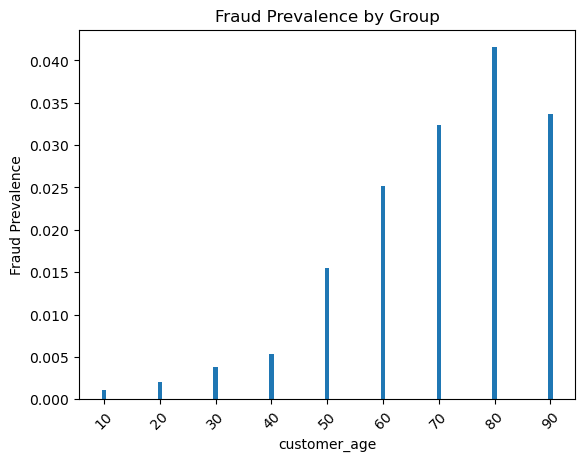

Prevalence Disparities: 38.027970471491635


In [15]:
dataset=variant_2
# Step 2: Identify the sensitive attribute or group (e.g., 'source')
sensitive_attribute = 'customer_age'



# Step 3: Calculate the prevalence of fraud for each group
fraud_counts = dataset.groupby(sensitive_attribute)['fraud_bool'].sum()
total_counts = dataset.groupby(sensitive_attribute)['fraud_bool'].count()
prevalence_by_group = fraud_counts / total_counts

# Step 4: Compare the prevalence values across different groups and handle zero prevalence
non_zero_prevalences = prevalence_by_group[prevalence_by_group > 0]
if len(non_zero_prevalences) == 0:
    # If all groups have zero prevalence, set prevalence_disparities to 0.0
    prevalence_disparities = 0.0
else:
    prevalence_disparities = non_zero_prevalences.max() / non_zero_prevalences.min()

# Step 5: Visualize the prevalence disparities
plt.bar(prevalence_by_group.index, prevalence_by_group.values)
plt.xlabel(sensitive_attribute)
plt.ylabel('Fraud Prevalence')
plt.title('Fraud Prevalence by Group')
plt.xticks(rotation=45)
plt.show()

print("Prevalence Disparities:", prevalence_disparities)

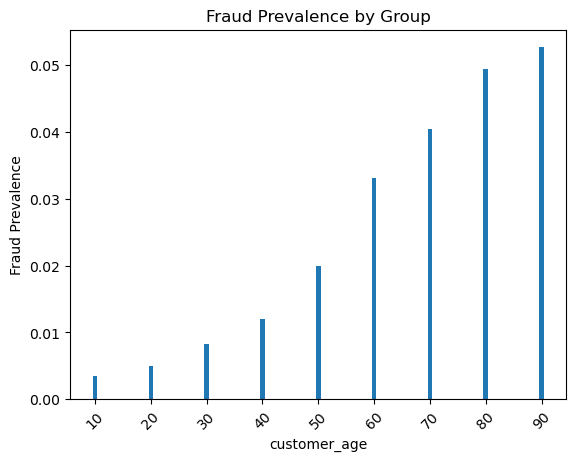

Prevalence Disparities: 14.926742532005688


In [16]:
dataset=base
# Step 2: Identify the sensitive attribute or group (e.g., 'source')
sensitive_attribute = 'customer_age'



# Step 3: Calculate the prevalence of fraud for each group
fraud_counts = dataset.groupby(sensitive_attribute)['fraud_bool'].sum()
total_counts = dataset.groupby(sensitive_attribute)['fraud_bool'].count()
prevalence_by_group = fraud_counts / total_counts

# Step 4: Compare the prevalence values across different groups and handle zero prevalence
non_zero_prevalences = prevalence_by_group[prevalence_by_group > 0]
if len(non_zero_prevalences) == 0:
    # If all groups have zero prevalence, set prevalence_disparities to 0.0
    prevalence_disparities = 0.0
else:
    prevalence_disparities = non_zero_prevalences.max() / non_zero_prevalences.min()

# Step 5: Visualize the prevalence disparities
plt.bar(prevalence_by_group.index, prevalence_by_group.values)
plt.xlabel(sensitive_attribute)
plt.ylabel('Fraud Prevalence')
plt.title('Fraud Prevalence by Group')
plt.xticks(rotation=45)
plt.show()

print("Prevalence Disparities:", prevalence_disparities)